# **Análise de engajamento dos alunos.**
**Este notebook tem como objetivo demonstrar a quantidade de cliques em cada função da disicplina 4300459.**

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go  
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import datetime

In [181]:
notas = pd.read_table('data/nonpublic/grades-4300459-2020.csv', sep=',')
notas.sample(0)

,userid,nota


In [182]:
tabela = pd.read_table('data/nonpublic/logs-4300459-2021.csv', sep=',')
tabela.sample(0)

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,...,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid


In [183]:
N=10000
alunos = tabela.query("userid != 2 & userid != -1 & userid !=6")

**Alunos que mais submeteram o quiz.**

In [184]:
quiz = alunos.query("component == 'mod_quiz'")
quiz_envios = quiz.query("action == 'submitted'")
quiz_envios_por_userid = quiz_envios.groupby('userid')['id'].count()
quiz_envios_por_userid[:5]

userid
1170    2
2471    1
3021    4
3596    6
4928    2
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

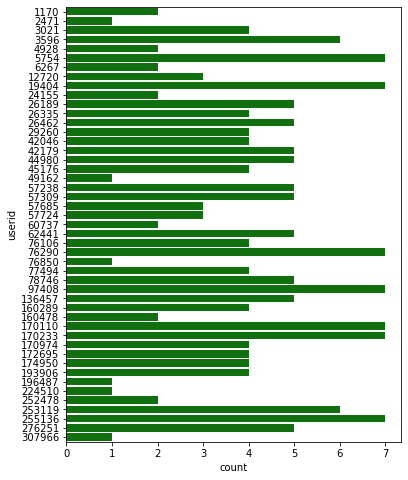

In [185]:
quizes = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=quiz_envios, color="g")

**Alunos que mais mandaram mensagens no chat.**

In [186]:
forum = alunos.query("component == 'mod_forum'")
forum['action'].value_counts()

viewed      3142
created      418
uploaded     371
deleted       60
updated       40
Name: action, dtype: int64

In [187]:
forum_envios = forum.query("action == 'created'")
forum_envios_por_userid = forum_envios.groupby('userid')['id'].count()
forum_envios_por_userid[:5]

userid
1170      5
3021      7
3596      6
5754     13
12720     2
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

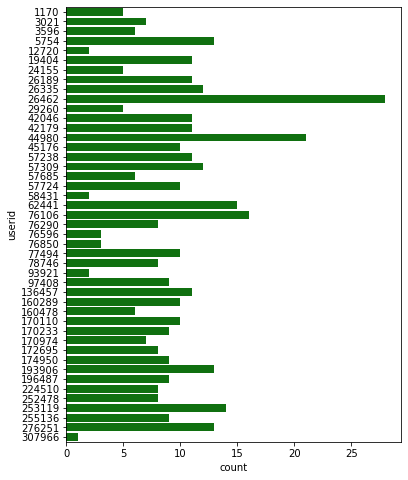

In [188]:
msgforum = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=forum_envios, color="g")

In [189]:
assign = alunos.query("component == 'mod_assign'")
assign['action'].value_counts()

viewed       2495
submitted     135
accepted       39
updated         1
Name: action, dtype: int64

In [190]:
assign_visual = assign.query("action == 'viewed'")
assign_visual_por_userid = assign_visual.groupby('userid')['id'].count()
assign_visual_por_userid[:5]

userid
3021     29
3596     29
5754     19
12720     4
19404    87
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

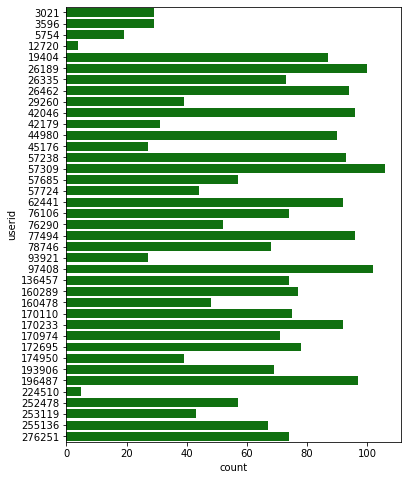

In [191]:
assign_viewed = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=assign_visual, color="g")

In [192]:
assign_submitted = assign.query("action == 'submitted'")
assign_submitted_por_userid = assign_submitted.groupby('userid')['id'].count()
assign_submitted_por_userid[:5]

userid
3021     2
3596     1
5754     1
19404    4
26189    5
Name: id, dtype: int64

<AxesSubplot:xlabel='count', ylabel='userid'>

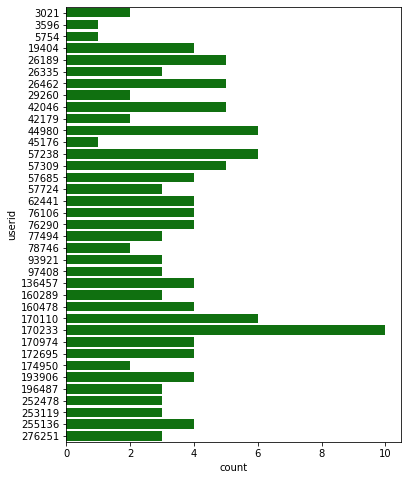

In [193]:
assign_submetido = plt.subplots(figsize=(6, 8))
sns.countplot(y="userid", data=assign_submitted, color="g")

In [194]:
indicadores = pd.concat([quiz_envios_por_userid,forum_envios_por_userid,assign_visual_por_userid,assign_submitted_por_userid],axis = 1)
indicadores = indicadores.fillna(0)
indicadores.columns = ['Fez_quiz','Enviou_forum','Viu_tarefa','Enviou_tarefa']
indicadores[:5]

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa
userid,,,,
1170,2.0,5.0,0.0,0.0
2471,1.0,0.0,0.0,0.0
3021,4.0,7.0,29.0,2.0
3596,6.0,6.0,29.0,1.0
4928,2.0,0.0,0.0,0.0


In [195]:
indicadores['Fez_quiz_z'] = stats.zscore(indicadores['Fez_quiz'],ddof=1)
indicadores['Enviou_forum_z'] = stats.zscore(indicadores['Enviou_forum'],ddof=1)
indicadores['Viu_tarefa_z'] = stats.zscore(indicadores['Viu_tarefa'],ddof=1)
indicadores['Enviou_tarefa_z'] = stats.zscore(indicadores['Enviou_tarefa'],ddof=1)
indicadores[:5]

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z
userid,,,,,,,,
1170,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511
2471,1.0,0.0,0.0,0.0,-1.329666,-1.528651,-1.357506,-1.239511
3021,4.0,7.0,29.0,2.0,0.115623,-0.248680,-0.568575,-0.321355
3596,6.0,6.0,29.0,1.0,1.079149,-0.431533,-0.568575,-0.780433
4928,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511


In [196]:
indicadores['Engajamento'] = (indicadores['Fez_quiz_z'] + 
                              indicadores['Enviou_forum_z'] + 
                              indicadores['Viu_tarefa_z'] + 
                              indicadores['Enviou_tarefa_z'])/4
indicadores[:5]

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento
userid,,,,,,,,,
1170,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511,-1.014826
2471,1.0,0.0,0.0,0.0,-1.329666,-1.528651,-1.357506,-1.239511,-1.363833
3021,4.0,7.0,29.0,2.0,0.115623,-0.248680,-0.568575,-0.321355,-0.255747
3596,6.0,6.0,29.0,1.0,1.079149,-0.431533,-0.568575,-0.780433,-0.175348
4928,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511,-1.243393


**Correlacionando os indicadores.**

In [197]:
indicadores.corr()

,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento
Fez_quiz,1.000000,0.595644,0.619947,0.615656,1.000000,0.595644,0.619947,0.615656,0.816310
Enviou_forum,0.595644,1.000000,0.708481,0.622555,0.595644,1.000000,0.708481,0.622555,0.843825
Viu_tarefa,0.619947,0.708481,1.000000,0.852438,0.619947,0.708481,1.000000,0.852438,0.917112
Enviou_tarefa,0.615656,0.622555,0.852438,1.000000,0.615656,0.622555,0.852438,1.000000,0.891101
Fez_quiz_z,1.000000,0.595644,0.619947,0.615656,1.000000,0.595644,0.619947,0.615656,0.816310
Enviou_forum_z,0.595644,1.000000,0.708481,0.622555,0.595644,1.000000,0.708481,0.622555,0.843825
Viu_tarefa_z,0.619947,0.708481,1.000000,0.852438,0.619947,0.708481,1.000000,0.852438,0.917112
Enviou_tarefa_z,0.615656,0.622555,0.852438,1.000000,0.615656,0.622555,0.852438,1.000000,0.891101
Engajamento,0.816310,0.843825,0.917112,0.891101,0.816310,0.843825,0.917112,0.891101,1.000000


**Histograma do engajamento dos alunos na disiciplina.**

<AxesSubplot:xlabel='Engajamento', ylabel='Count'>

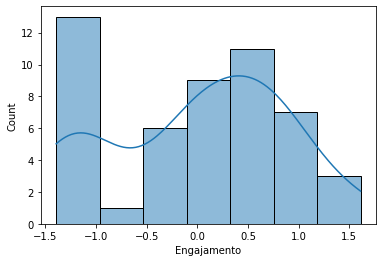

In [198]:
sns.histplot(data=indicadores, x="Engajamento", kde=True)

In [199]:
indicadores_nota = pd.merge(indicadores, notas, how = 'inner', on = 'userid')
indicadores_nota[:5]

,userid,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento,nota
0,1170,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511,-1.014826,0.73043
1,2471,1.0,0.0,0.0,0.0,-1.329666,-1.528651,-1.357506,-1.239511,-1.363833,0.26087
2,3021,4.0,7.0,29.0,2.0,0.115623,-0.248680,-0.568575,-0.321355,-0.255747,5.00000
3,3596,6.0,6.0,29.0,1.0,1.079149,-0.431533,-0.568575,-0.780433,-0.175348,5.45536
4,4928,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511,-1.243393,0.41739


# Alunos que aprovaram e reprovaram.

**Alunos que aprovaram.**

In [200]:
aprovados = indicadores_nota.query("nota >= 5")
aprovados[:5]

,userid,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento,nota
2,3021,4.0,7.0,29.0,2.0,0.115623,-0.248680,-0.568575,-0.321355,-0.255747,5.00000
3,3596,6.0,6.0,29.0,1.0,1.079149,-0.431533,-0.568575,-0.780433,-0.175348,5.45536
5,5754,7.0,13.0,19.0,1.0,1.560912,0.848438,-0.840620,-0.780433,0.197074,6.07664
8,19404,7.0,11.0,87.0,4.0,1.560912,0.482732,1.009288,0.596802,0.912433,7.75362
10,26189,5.0,11.0,100.0,5.0,0.597386,0.482732,1.362947,1.055880,0.874736,8.77805


Text(0, 0.5, 'Nota')

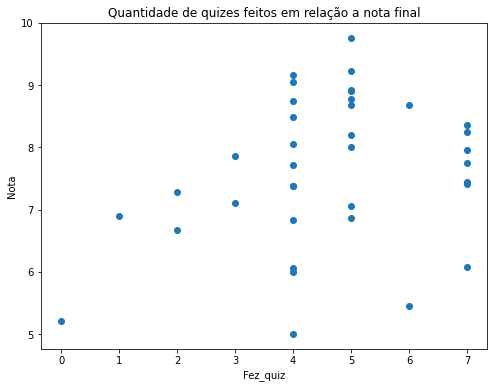

In [201]:
x = aprovados['Fez_quiz']
y = aprovados['nota']
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Quantidade de quizes feitos em relação a nota final')
plt.xlabel('Fez_quiz')
plt.ylabel('Nota')

Text(0, 0.5, 'Nota')

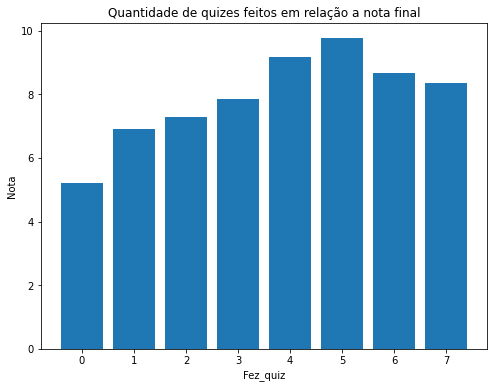

In [202]:
x = aprovados['Fez_quiz']
y = aprovados['nota']
plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.title('Quantidade de quizes feitos em relação a nota final')
plt.xlabel('Fez_quiz')
plt.ylabel('Nota')

**Pode-se notar que as maiores notas não foram adquiridas por quem fez o maior numero de quizes**

Text(0, 0.5, 'Nota')

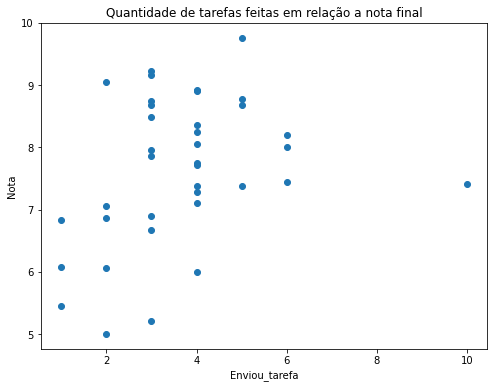

In [203]:
x = aprovados['Enviou_tarefa']
y = aprovados['nota']
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Quantidade de tarefas feitas em relação a nota final')
plt.xlabel('Enviou_tarefa')
plt.ylabel('Nota')

Text(0, 0.5, 'Nota')

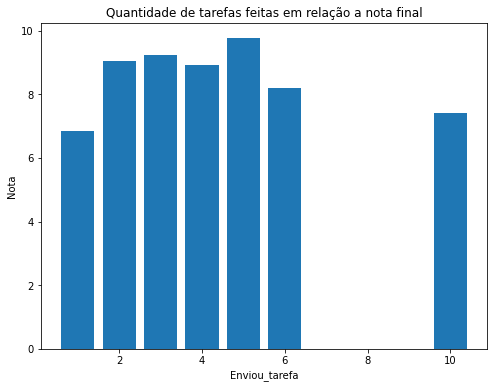

In [204]:
x = aprovados['Enviou_tarefa']
y = aprovados['nota']
plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.title('Quantidade de tarefas feitas em relação a nota final')
plt.xlabel('Enviou_tarefa')
plt.ylabel('Nota')

**Alunos que reprovaram.** 

In [205]:
reprovados = indicadores_nota.query("nota <5")
reprovados[:50]

,userid,Fez_quiz,Enviou_forum,Viu_tarefa,Enviou_tarefa,Fez_quiz_z,Enviou_forum_z,Viu_tarefa_z,Enviou_tarefa_z,Engajamento,nota
0,1170,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511,-1.014826,0.73043
1,2471,1.0,0.0,0.0,0.0,-1.329666,-1.528651,-1.357506,-1.239511,-1.363833,0.26087
4,4928,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511,-1.243393,0.41739
6,6267,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511,-1.243393,0.26087
7,12720,3.0,2.0,4.0,0.0,-0.366140,-1.162945,-1.248688,-1.239511,-1.004321,1.26826
9,24155,2.0,5.0,0.0,0.0,-0.847903,-0.614386,-1.357506,-1.239511,-1.014826,0.73043
22,58431,0.0,2.0,0.0,0.0,-1.811428,-1.162945,-1.357506,-1.239511,-1.392848,3.58261
23,60737,2.0,0.0,0.0,0.0,-0.847903,-1.528651,-1.357506,-1.239511,-1.243393,0.52174
27,76596,0.0,3.0,0.0,0.0,-1.811428,-0.980092,-1.357506,-1.239511,-1.347134,0.13043
28,76850,1.0,3.0,0.0,0.0,-1.329666,-0.980092,-1.357506,-1.239511,-1.226694,0.46957


Text(0, 0.5, 'Nota')

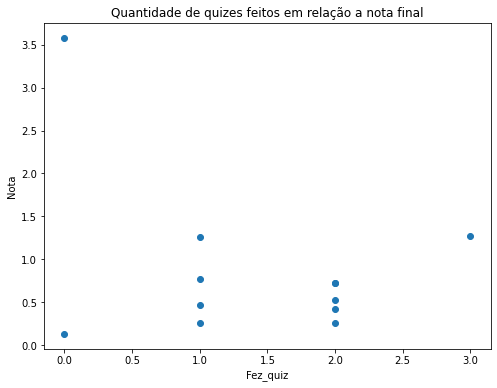

In [206]:
x = reprovados['Fez_quiz']
y = reprovados['nota']
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Quantidade de quizes feitos em relação a nota final')
plt.xlabel('Fez_quiz')
plt.ylabel('Nota')

Text(0, 0.5, 'Nota')

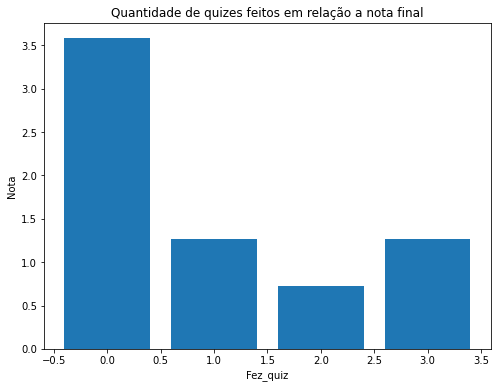

In [207]:
x = reprovados['Fez_quiz']
y = reprovados['nota']
plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.title('Quantidade de quizes feitos em relação a nota final')
plt.xlabel('Fez_quiz')
plt.ylabel('Nota')

**Tem alunos que mesmo não fazendo o quiz, obtiveram 3.5 de nota, isso pode estar atrelado a o outro indicador (Tarefa).**

Text(0, 0.5, 'Nota')

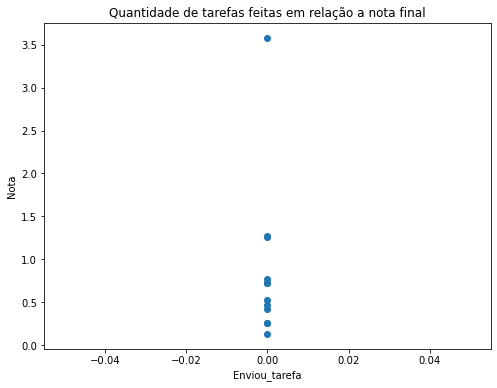

In [208]:
x = reprovados['Enviou_tarefa']
y = reprovados['nota']
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.title('Quantidade de tarefas feitas em relação a nota final')
plt.xlabel('Enviou_tarefa')
plt.ylabel('Nota')

Text(0, 0.5, 'Nota')

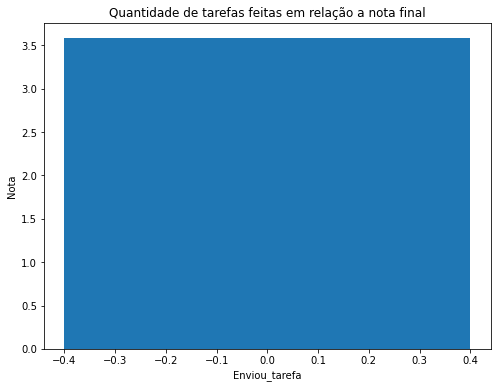

In [209]:
x = reprovados['Enviou_tarefa']
y = reprovados['nota']
plt.figure(figsize=(8, 6))
plt.bar(x, y)
plt.title('Quantidade de tarefas feitas em relação a nota final')
plt.xlabel('Enviou_tarefa')
plt.ylabel('Nota')

**Todos os alunos que reprovaram não enviaram tarefas (isso pode ser observado na tabela acima).**

# Vamos analisar agora quantos cliques temos na disiciplina ao longo do semestre para cada aluno que reprovou.

In [210]:
pd.to_datetime(alunos.timecreated)
alunos.set_index('timecreated', inplace = True)

<AxesSubplot:xlabel='userid,timecreated'>

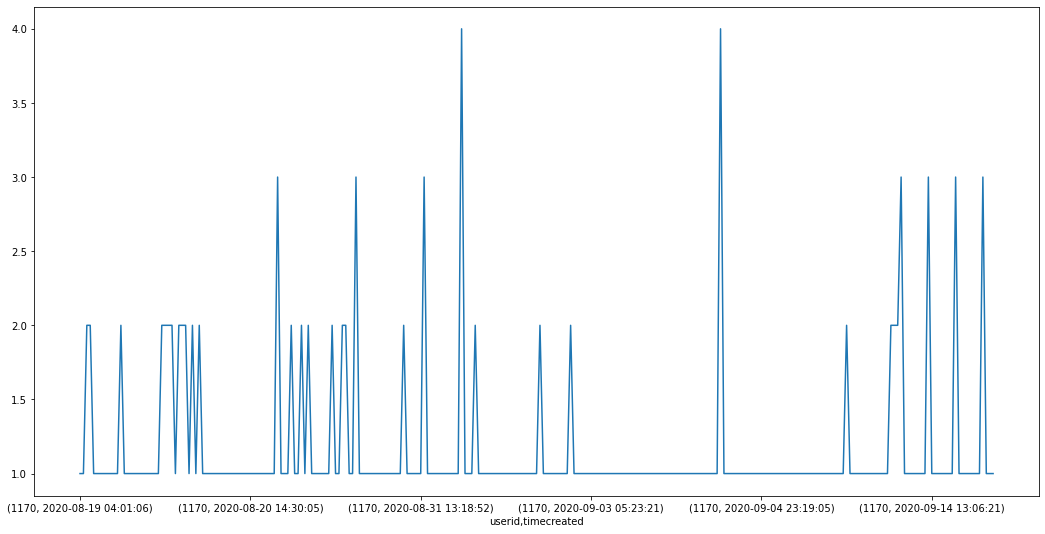

In [233]:
clics_semestre = alunos.query("userid in [1170]")
clics_do_aluno = clics_semestre.groupby(['userid','timecreated'])['action'].count()
clics_do_aluno.plot(figsize=(18,9))

**Podemos notar que os meses no eixo X acompanham as interações (clics) de cada aluno, ou seja, caso haja um aluno aprovado para ser analisado, veremos que o eixo X acompanhará até a data final do curso no semestre.**  

In [212]:
#https://stackoverflow.com/questions/51556953/how-to-plot-time-as-x-axis-in-pandas

In [234]:
clics_do_aluno[:5]

userid  timecreated        
1170    2020-08-19 04:01:06    1
        2020-08-19 04:01:57    1
        2020-08-19 04:02:47    2
        2020-08-19 04:02:50    2
        2020-08-19 04:04:10    1
Name: action, dtype: int64

In [249]:
clics_semestre2 = alunos.query("userid in [5754]")
clics_do_aluno2 = clics_semestre2.groupby(['userid','timecreated'])['action'].count()
clics_do_aluno2[:5]

userid  timecreated        
5754    2020-08-17 11:31:43    1
        2020-08-17 11:32:41    1
        2020-08-17 11:32:56    1
        2020-08-17 13:09:54    1
        2020-08-17 13:10:11    1
Name: action, dtype: int64

In [254]:
compara_alunos = pd.merge(clics_do_aluno2, clics_do_aluno, how = 'outer', on = 'timecreated')
compara_alunos

,action_x,action_y
timecreated,,
2020-08-17 11:31:43,1.0,NaN
2020-08-17 11:32:41,1.0,NaN
2020-08-17 11:32:56,1.0,NaN
2020-08-17 13:09:54,1.0,NaN
2020-08-17 13:10:11,1.0,NaN
...,...,...
2020-10-05 13:24:09,NaN,1.0
2020-10-05 13:24:41,NaN,3.0
2020-10-05 13:24:55,NaN,1.0


<AxesSubplot:xlabel='timecreated'>

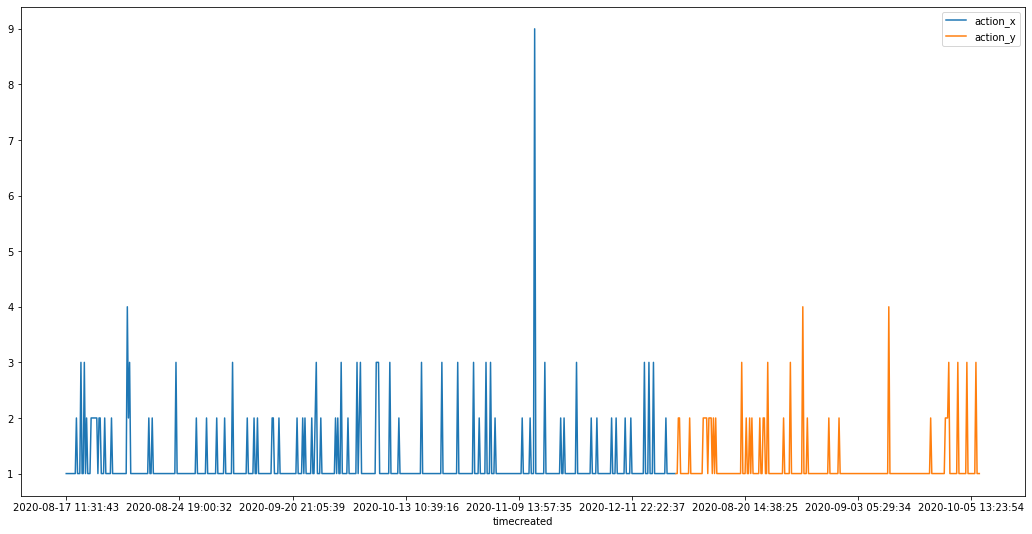

In [255]:
compara_alunos.plot(figsize=(18,9))

# Regressão Linear. 

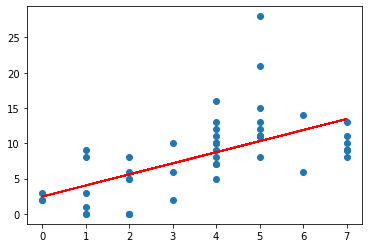

In [213]:
X = indicadores.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = indicadores.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

**Possiveis alunos desistentes são aqueles alunos que não fizeram os quizes e não enviaram tarfas.**

In [214]:
#mais indicadores atribuir peso aos indicadores
#criar visualisações através do corr
#regressão linear notas finais eixo vertical/ tentativas do questionario horizontal 
#grafico com pontos em vez de barras (feito)
#plotar nº clics por semana em um semestre/trimestre (feito)
#investigar time series em pandas com o index (feito)
#py stats models
#https://www.youtube.com/watch?v=JuG8hwVK5uQ